<a href="https://colab.research.google.com/github/brainmentorspvtltd/DU_PythonDLApril/blob/main/CNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

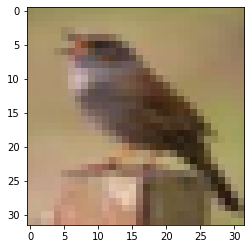

In [ ]:
plt.imshow(x_train[560])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7122 - accuracy: 0.3809 - val_loss: 1.2033 - val_accuracy: 0.5762
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1484 - accuracy: 0.5958 - val_loss: 1.0981 - val_accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9847 - accuracy: 0.6573 - val_loss: 0.9708 - val_accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8948 - accuracy: 0.6884 - val_loss: 1.0131 - val_accuracy: 0.6502
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8105 - accuracy: 0.7175 - val_loss: 0.9232 - val_accuracy: 0.6823
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7507 - accuracy: 0.7336 - val_loss: 0.9162 - val_accuracy: 0.6834
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7034 - accuracy: 0.7527 - val_loss: 0.8906 - val_accuracy:

In [ ]:
import numpy as np
np.argmax(model.predict(x_test[0].reshape(1,32,32,3)))

3

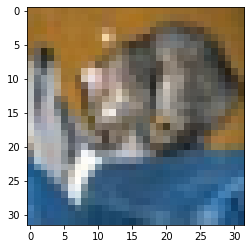

In [ ]:
plt.imshow(x_test[0])